# Pandas practice with 'Airline On-Time Performance Data' from US Department of Transportation

## BRIEF

Source: United States Department of Transportation
Data: Airline On-Time Performance Data
Period: Marzo y Abril 2020
Description: Updated data of all domestic flights, by airline, origin and destination, which were carried out during the months of March and April 2020 in the US (before and during confinement as a result of COVID 19). They include information on departure, arrival, delays, cancellations, distances...
Link: https://www.transtats.bts.gov/Fields.asp


## IMPORT PANDAS

In [1]:
import pandas as pd

## LOADING DATA

In [2]:
from zipfile import ZipFile
dfs = []
for name in ['On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip',
            'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip']:
    zfile = ZipFile(name)
    csv = zfile.open(zfile.filelist[0])
    dfs.append(pd.read_csv(csv))
    csv.close()
    zfile.close()

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
flights = pd.concat(dfs)

## DATA OVERVIEW

In [4]:
flights.shape 

(961611, 110)

In [6]:
flights.sample(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
463507,2020,1,3,13,5,2020-03-13,YX,20452,YX,N101HQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173874,2020,2,4,16,4,2020-04-16,DL,19790,DL,N120DU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160627,2020,2,4,27,1,2020-04-27,B6,20409,B6,N986JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74205,2020,2,4,29,3,2020-04-29,OO,20304,OO,N256SY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75278,2020,1,3,6,5,2020-03-06,AA,19805,AA,N186US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522912,2020,1,3,27,5,2020-03-27,OO,20304,OO,N715SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260829,2020,2,4,19,7,2020-04-19,WN,19393,WN,N945WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78085,2020,2,4,6,1,2020-04-06,OO,20304,OO,N794SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20753,2020,1,3,10,2,2020-03-10,9E,20363,9E,N903XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243157,2020,2,4,26,7,2020-04-26,WN,19393,WN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA SELECTION

In [10]:
from IPython.display import IFrame
IFrame('readme.html', 800, 600)

In [11]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
FlightDate                         961611 non-null object
DayOfWeek                          961611 non-null int64
Reporting_Airline                  961611 non-null object
Tail_Number                        822783 non-null object
Flight_Number_Reporting_Airline    961611 non-null int64
Origin                             961611 non-null object
OriginCityName                     961611 non-null object
OriginStateName                    961611 non-null object
OriginCityMarketID                 961611 non-null int64
Dest                               961611 non-null object
DestCityName                       961611 non-null object
DestStateName                      961611 non-null object
DestCityMarketID                   961611 non-null int64
DepTime                            721658 non-null float64
DepDelay                           721656 non-null float64
AirTime              

In [13]:
flights.sample(10)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
445694,2020-03-21,6,YV,N511MJ,6238,CLT,"Charlotte, NC",North Carolina,31057,IAD,"Washington, DC",Virginia,30852,NaN,NaN,NaN,322.0
195162,2020-04-14,2,EV,N611UX,4172,CLE,"Cleveland, OH",Ohio,30647,IAH,"Houston, TX",Texas,31453,NaN,NaN,NaN,1091.0
614302,2020-03-24,2,UA,NaN,802,DEN,"Denver, CO",Colorado,30325,PSP,"Palm Springs, CA",California,34262,NaN,NaN,NaN,776.0
148952,2020-03-19,4,B6,N355JB,845,BOS,"Boston, MA",Massachusetts,30721,SYR,"Syracuse, NY",New York,35096,2238.0,-12.0,48.0,265.0
278621,2020-04-07,2,WN,NaN,1790,LAX,"Los Angeles, CA",California,32575,DAL,"Dallas, TX",Texas,30194,NaN,NaN,NaN,1246.0
149269,2020-04-03,5,AA,NaN,2671,SAN,"San Diego, CA",California,33570,PHX,"Phoenix, AZ",Arizona,30466,NaN,NaN,NaN,304.0
333818,2020-03-08,7,WN,N7712G,5614,BWI,"Baltimore, MD",Maryland,30852,ATL,"Atlanta, GA",Georgia,30397,1916.0,16.0,82.0,577.0
24449,2020-03-26,4,9E,N904XJ,5380,MSP,"Minneapolis, MN",Minnesota,31650,RIC,"Richmond, VA",Virginia,34524,1741.0,-12.0,100.0,970.0
536735,2020-03-11,3,OO,N168SY,5914,SFO,"San Francisco, CA",California,32457,MSN,"Madison, WI",Wisconsin,33485,828.0,-2.0,210.0,1772.0
202312,2020-04-12,7,G4,NaN,1794,FLL,"Fort Lauderdale, FL",Florida,32467,LEX,"Lexington, KY",Kentucky,32945,NaN,NaN,NaN,865.0


## LET'S PRACTICE

How many airports do we have?

In [15]:
flights['Origin'].nunique()

353

How many flight connections?

In [19]:
( flights['Origin'] + '-' + flights['Dest'] ).nunique()


5844

Which cities have more airports?

In [22]:
flights.groupby('OriginCityName')['Origin'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .head(10)

,nunique,unique
OriginCityName,,
"New York, NY",2,"[JFK, LGA]"
"Chicago, IL",2,"[ORD, MDW]"
"Mobile, AL",2,"[MOB, BFM]"
"Phoenix, AZ",2,"[PHX, AZA]"
"Columbus, OH",2,"[CMH, LCK]"
"Houston, TX",2,"[IAH, HOU]"
"Washington, DC",2,"[DCA, IAD]"
"Aberdeen, SD",1,[ABR]
"North Platte, NE",1,[LBF]


In [24]:
flights.groupby('OriginCityMarketID')['Origin'] \
    .agg(['nunique','unique']) \
    .sort_values(by='nunique', ascending=False) \
    .head(10)

,nunique,unique
OriginCityMarketID,,
31703,6,"[JFK, LGA, HPN, EWR, SWF, ISP]"
32575,5,"[LAX, ONT, SNA, BUR, LGB]"
32457,3,"[SFO, SJC, OAK]"
30852,3,"[DCA, IAD, BWI]"
30721,3,"[PVD, BOS, MHT]"
30977,2,"[ORD, MDW]"
30194,2,"[DFW, DAL]"
31453,2,"[IAH, HOU]"
32467,2,"[MIA, FLL]"


The shortest flight:

In [25]:
flights['Distance'].min() 

31.0

In [26]:
flights.groupby(['OriginCityName','DestCityName'])['Distance'].mean().sort_values().head(3) 

OriginCityName     DestCityName  
Petersburg, AK     Wrangell, AK      31.0
Wrangell, AK       Petersburg, AK    31.0
San Francisco, CA  Santa Rosa, CA    66.0
Name: Distance, dtype: float64

The longest flight:

In [28]:
flights['Distance'].max() 

5095.0

In [29]:
flights.groupby(['OriginCityName','DestCityName'])['Distance'].mean().sort_values().tail(3)

OriginCityName  DestCityName
New York, NY    Honolulu, HI    4983.0
Boston, MA      Honolulu, HI    5095.0
Honolulu, HI    Boston, MA      5095.0
Name: Distance, dtype: float64

The fastest flights:

In [31]:
flights.groupby(['OriginCityName','DestCityName'])[['Distance','AirTime','DepDelay']].mean().sort_values(by='AirTime').head(3)

,,Distance,AirTime,DepDelay
OriginCityName,DestCityName,,,
"Wrangell, AK","Petersburg, AK",31.0,11.344828,-5.813559
"Petersburg, AK","Wrangell, AK",31.0,11.800000,-5.737705
"San Juan, PR","Charlotte Amalie, VI",68.0,16.298851,-1.793103


The slowest flights:

In [34]:
flights.groupby(['OriginCityName','DestCityName'])[['Distance','AirTime','DepDelay']].mean().sort_values(by='AirTime', ascending=False).head(3)

,,Distance,AirTime,DepDelay
OriginCityName,DestCityName,,,
"Boston, MA","Honolulu, HI",5095.0,651.526316,0.947368
"New York, NY","Honolulu, HI",4983.0,642.884615,-2.884615
"Newark, NJ","Honolulu, HI",4962.0,621.678571,3.892857


How flights are concentrated by distance range?

In [35]:
distance_bins = pd.cut(flights['Distance'],range(0,5500,500))

In [36]:
flights_by_distance = distance_bins.value_counts()

In [37]:
airtime_depdelay_by_distance = flights.groupby(distance_bins)[['AirTime','DepDelay']].mean()

In [38]:
stats_by_distance = pd.concat((flights_by_distance,airtime_depdelay_by_distance), axis=1)
stats_by_distance

,Distance,AirTime,DepDelay
"(0, 500]",363272,52.703290,-0.280269
"(500, 1000]",344176,104.993628,0.241551
"(1000, 1500]",151471,159.135933,1.004658
"(1500, 2000]",56512,220.357090,1.853210
"(2000, 2500]",32549,288.780056,0.665167
"(2500, 3000]",12380,323.915841,0.776702
"(3000, 3500]",249,390.316062,4.778351
"(3500, 4000]",570,431.611231,2.436285
"(4000, 4500]",168,478.942308,1.692308
"(4500, 5000]",222,561.227723,2.153465


What is the number of flights by month?

In [39]:
flights.groupby(flights['FlightDate'].str[-5:-3]).count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
FlightDate,,,,,,,,,,,,,,,,,
03,648229,648229,648229,599908,648229,648229,648229,648229,648229,648229,648229,648229,648229,538275,538273,537244,648229
04,313382,313382,313382,222875,313382,313382,313382,313382,313382,313382,313382,313382,313382,183383,183383,183006,313382


How was its distribution day by day?

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

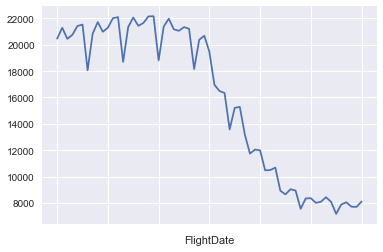

In [41]:
daily_flights = flights.groupby(flights['FlightDate'].str[-5:])['FlightDate'].count()
daily_flights.plot()

How were distributed delays day by day?

In [42]:
delays_per_day= flights.groupby(flights['FlightDate'].str[-5:]) ['DepDelay'].describe()
delays_per_day[['max','mean','50%','std']]

,max,mean,50%,std
FlightDate,,,,
03-01,1824.0,3.414015,-3.0,37.087099
03-02,1919.0,2.150733,-4.0,36.984158
03-03,1625.0,0.742677,-5.0,35.954623
03-04,1458.0,5.037989,-4.0,36.212691
03-05,1432.0,2.508790,-4.0,35.418548
03-06,1740.0,4.775386,-4.0,43.358109
03-07,2466.0,1.321464,-4.0,40.508968
03-08,1330.0,2.927317,-4.0,35.318091
03-09,1343.0,0.571613,-5.0,30.298901


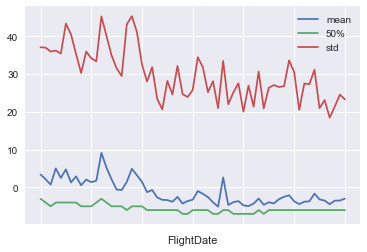

In [43]:
delays_per_day[['mean','50%','std']].plot()

Average delays by airlines and day of the week:

In [44]:
flights.pivot_table(index='Reporting_Airline',
                    columns='DayOfWeek', 
                    values='DepDelay',
                   aggfunc=['mean','std'])

mean                                                    \
DayOfWeek                 1         2         3         4         5         6   
Reporting_Airline                                                               
9E                -1.707888 -2.419213 -1.649101 -1.063947  5.429478 -0.854762   
AA                -0.224525 -0.559173  2.343172  1.606453  3.250790  0.469832   
AS                -3.028130 -3.333931 -3.049471 -3.571046 -0.464286 -0.625544   
B6                -0.271827 -2.905212 -1.211667 -3.060995  1.330606  1.251513   
DL                 0.398689 -0.788563  2.626048  2.006141  2.021452  0.822409   
EV                -3.330180 -4.691929 -2.401846 -4.482199 -1.713975 -3.783871   
F9                 0.310252 -0.458415 -0.026334  0.439729  4.596370  1.902635   
G4                 5.367169 -1.790609  0.089943  9.346806  7.529054  4.461660   
HA                -0.941385  8.142466 -1.621141 -2.818182 -2.800826 -2.882759   
MQ                -2.696903 -3.062567 -1.486822 -0.437968  0.932697 -0.627907   
NK                 4.820390  3.690234  4.221722  3.396692  5.467430  4.041904   
OH                 4.610658  0.932104  2.290122  1.276879  3.315338 -0.138889   
OO                 0.334075 -1.242576  0.626029  1.556310  3.820079  0.794643   
UA                -1.800590 -0.736026 -1.412125 -0.300822  5.105694  1.248512   
WN                -1.234474 -1.054350 -1.022444 -0.083004  0.196322 -0.215981   
YV                 2.203698 -0.400274  5.694783  3.696464  3.986076  2.892055   
YX                -3.736144 -4.222489 -3.384430 -3.622343  1.810401 -2.532226   

                                   std                                   \
DayOfWeek                 7          1          2          3          4   
Reporting_Airline                                                         
9E                -2.967217  27.378469  22.735001  24.265024  27.896291   
AA                 0.539833  36.850476  38.394845  43.942001  39.602546   
AS                 0.015668  24.525450  25.148574  23.767425  22.458479   
B6                 1.907815  28.692318  25.973055  29.165235  22.653290   
DL                 0.357781  31.174191  25.651890  40.182069  34.454294   
EV                -3.053221  30.939230  19.528403  24.632177  18.828120   
F9                 0.082505  31.100377  28.302952  26.905792  33.360673   
G4                 4.709606  59.924418  29.703072  43.548383  74.003920   
HA                -3.590426  23.807490  52.786311  34.410683  15.332077   
MQ                -2.359440  29.584429  29.135554  24.732707  39.335503   
NK                 3.947994  30.624811  34.708244  42.716226  38.861156   
OH                 0.850226  49.252463  42.853019  44.563882  38.179490   
OO                 0.866443  38.638619  34.428049  44.940604  44.978355   
UA                 0.397874  29.802359  33.774344  24.762971  35.510562   
WN                -0.459891  12.606486  13.704918  12.347242  16.421916   
YV                 2.640602  44.576030  47.433572  46.082521  43.438379   
YX                -2.537602  18.515222  21.758533  19.469832  25.391566   

                                                    
DayOfWeek                  5          6          7  
Reporting_Airline                                   
9E                 59.671708  31.148983  19.648969  
AA                 46.759397  48.251405  36.691214  
AS                 27.957177  30.726813  29.769937  
B6                 35.296841  31.399115  33.800864  
DL                 31.398935  31.047499  27.715521  
EV                 23.742928  38.141429  24.130619  
F9                 36.359203  35.993060  28.969473  
G4                 58.085752  45.444294  55.946806  
HA                 13.881604  17.091106  13.463111  
MQ                 28.736956  33.498741  28.399545  
NK                 49.874717  37.200202  41.458964  
OH                 34.944033  32.981326  43.831198  
OO                 48.271452  42.819333  42.201047  
UA                 41.212541  31.500569  30.897164  


Average delays by hours:

In [46]:
flights['str_DepTime']=flights['DepTime'].astype(str)
flights['hours'] = flights['str_DepTime'].str[:-4]
flights['hours_num']= pd.to_numeric(flights['hours'])
describe = flights.groupby('hours_num')['DepDelay'].describe()
describe

,count,mean,std,min,25%,50%,75%,max
hours_num,,,,,,,,
1.0,813.0,30.907749,77.827222,-23.0,-8.0,-2.0,25.0,571.0
2.0,255.0,44.262745,103.829156,-32.0,-11.0,-3.0,62.0,677.0
3.0,174.0,23.143678,77.397682,-22.0,-10.0,-3.0,17.0,501.0
4.0,3110.0,-6.198392,22.469010,-25.0,-10.0,-7.0,-5.0,809.0
5.0,31057.0,-5.736968,15.500248,-36.0,-9.0,-6.0,-4.0,984.0
6.0,46563.0,-3.979039,23.676696,-48.0,-8.0,-5.0,-3.0,1458.0
7.0,42834.0,-2.160573,32.509869,-57.0,-8.0,-5.0,-2.0,1527.0
8.0,44246.0,-0.396013,35.391164,-40.0,-8.0,-5.0,-2.0,1553.0
9.0,41427.0,-0.017356,35.058823,-44.0,-8.0,-5.0,-2.0,1615.0


Average delays by airport:

In [49]:
describe_airports= flights.groupby(['Origin','OriginCityName'])['DepDelay'].describe().sort_values(by='count',ascending=False).head(10)
describe_airports

,,count,mean,std,min,25%,50%,75%,max
Origin,OriginCityName,,,,,,,,
ATL,"Atlanta, GA",36082.0,0.202760,20.998045,-68.0,-5.0,-3.0,-1.0,1147.0
ORD,"Chicago, IL",31428.0,-0.564465,29.295693,-54.0,-9.0,-6.0,-2.0,1266.0
DFW,"Dallas/Fort Worth, TX",30973.0,2.510380,30.579119,-43.0,-8.0,-5.0,-1.0,903.0
DEN,"Denver, CO",26016.0,0.781673,27.776435,-44.0,-8.0,-5.0,-1.0,1018.0
CLT,"Charlotte, NC",24880.0,-0.219815,29.129188,-40.0,-8.0,-6.0,-2.0,2579.0
LAX,"Los Angeles, CA",20082.0,1.088836,29.805579,-47.0,-8.0,-5.0,-1.0,1030.0
PHX,"Phoenix, AZ",19643.0,1.558010,26.449049,-27.0,-7.0,-4.0,0.0,974.0
DTW,"Detroit, MI",17475.0,1.127668,28.074756,-43.0,-6.0,-4.0,-1.0,961.0
IAH,"Houston, TX",16593.0,0.669801,37.093962,-33.0,-9.0,-6.0,-2.0,1533.0


# THANK YOUR FOR FOLLOWING

If you have any question, do not hesitate to contact me on Linkedin: https://www.linkedin.com/in/laurajmoreno/
